# Full implemetation of KNN in Python

In [21]:
import numpy as np
from numpy import *

def LoadIrisData(fname):
    
    # read the features data from the csv file
    X = np.loadtxt(fname,dtype=float, delimiter=',', skiprows = 1,usecols=[1,2,3,4])

    # read the labels data from the csv file
    Y = np.loadtxt(fname,dtype=str, delimiter=',', skiprows = 1,usecols=[5])
    
    return X, Y

In [22]:
from numpy.random import randint
def SplitTrainTest(X,Y):
    
    # permute the ordering of the examples
    ind = np.random.permutation(len(Y))

    # choose the size of the training data
    Ntrain = 80 

    # split the data into train and test datasets
    X_train = X[ind[:Ntrain]]
    Y_train = Y[ind[:Ntrain]]
    X_test  = X[ind[Ntrain:]]
    Y_test  = Y[ind[Ntrain:]]
    
    return X_train, Y_train, X_test, Y_test

In [23]:
def PairwiseDistance(a,b):

    return linalg.norm(a-b)


In [24]:
def SortArray(a):
    
    return argsort(a) 


In [25]:
def MajorityVote(inds,y,K):
    
    # the labels of the K nearest neighbors
    y_sorted_by_inds_k_neighbors = y[inds][0:K]
    # print(argmax(y_sorted_by_inds_k_neighbors))
       
    # counting the number occurences of each label amongst the K nearest neighbors
    uniqueVals, uniqueValsCounts = unique(y_sorted_by_inds_k_neighbors, return_counts=True)
    return uniqueVals[uniqueValsCounts.argmax()]
    # the most frequent label amongst the K nearest neighbors
    

In [26]:
def KNearestNeighborsClassifier(X_train, Y_train , X_test, K):
    
    Y_pred = []
    d=[]
    # loop through the examples to be classified
    for sample in X_test:
        for x in X_train:
            d.append(PairwiseDistance(sample,x))
        Y_pred.append(MajorityVote(SortArray(d),Y_train, K))
        d=[]

    return Y_pred

In [27]:
import matplotlib.pyplot as plt

def PlotAccuracy(accuracy):

    plt.figure(figsize=(14,5))
    plt.plot(accuracy,'.-')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN estimated accuracy for various values of K');
    return

In [28]:
def Accuracy(Y_pred, Y_test):

    counter = 0
    for index, yp in enumerate(Y_pred):
        if Y_test[index] == yp:
            counter+=1    

    return counter/len(Y_pred)

In [29]:
def main(fname, Kmax):
   
    # STEP 1: load data
    X,Y = LoadIrisData(fname)
    
    # STEP 2: split the data into train/test datasets
    X_train, Y_train, X_test, Y_test = SplitTrainTest(X,Y)
    print('Data is split into ' + str(X_train.shape[0]) + ' examples for training and ' + str(X_test.shape[0]) + ' examples for testing')
    
    # an array to store all computed accuracies
    accuracy = np.zeros(Kmax)
    
    # repeat for all considered values of K
    for K in range(Kmax):
        # STEP 3: classify the test data using a KNN classifier
        Y_pred = KNearestNeighborsClassifier(X_train, Y_train, X_test , K+1)

        # STEP 4: calculate the KNN classifier accuracy
        accuracy[K] = Accuracy(Y_pred, Y_test)
        
    # plot results
    PlotAccuracy(accuracy)
    return

Data is split into 80 examples for training and 70 examples for testing


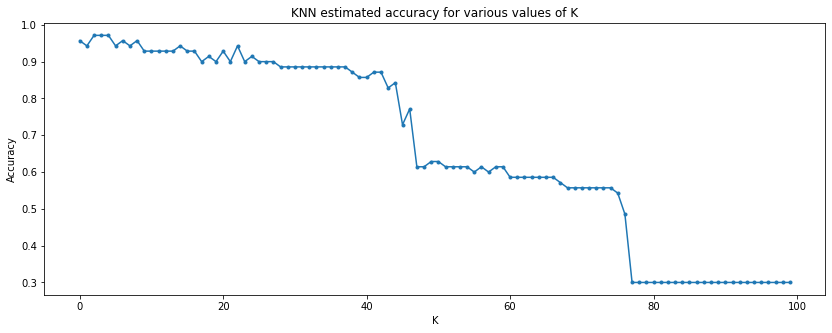

In [30]:
fname = 'iris.csv'
Kmax = 100
main(fname, Kmax)

Explanation about the graph above: 
According to the Iris.csv, we can see that there are equal amounts of each class (type of flower), so we expect that with K growing - the accuracy will decrease since it is no longer calculating by distance logic, but by majority. We can also see that there are two sharp decreases with accuracy when the threshold reaches a point where the majority mechanism kicks in (50, 80).
When K is within [80:100] we can see an accuracy of 0.3. this is expected since the data is divided to 3 classes (150 instances)

In [31]:
def SplitTrainTestDinamcly(X,Y,n):

    # permute the ordering of the examples
    ind = np.random.permutation(len(Y))

    # choose the size of the training data
    Ntrain = n 

    # split the data into train and test datasets
    X_train = X[ind[:n]]
    Y_train = Y[ind[:n]]
    X_test  = X[ind[n:]]
    Y_test  = Y[ind[n:]]
    
    return X_train, Y_train, X_test, Y_test
    

In [32]:
def averageMatrix(matrix):

    avgs=[]
    for k in matrix:
        avgs.append(sum(matrix[k])/len(matrix[k]))
        
    return avgs

In [33]:
def optimal_k(fname,Kmax):
    kmax_matrix_accuracies = {}
    # STEP 1: load data
    X,Y = LoadIrisData(fname)
    for n in range(20,120):
        X_train, Y_train, X_test, Y_test = SplitTrainTestDinamcly(X,Y,n)
        # an array to store all computed accuracies
        accuracy = np.zeros(Kmax)
        # repeat for all considered values of K
        for K in range(Kmax):
            if K not in kmax_matrix_accuracies:
                kmax_matrix_accuracies[K]=[]
        # STEP 3: classify the test data using a KNN classifier
            Y_pred = KNearestNeighborsClassifier(X_train, Y_train, X_test , K+1)

        # STEP 4: calculate the KNN classifier accuracy
            accuracy[K] = Accuracy(Y_pred, Y_test)
            kmax_matrix_accuracies[K].append(accuracy[K])
    PlotAccuracy(averageMatrix(kmax_matrix_accuracies))

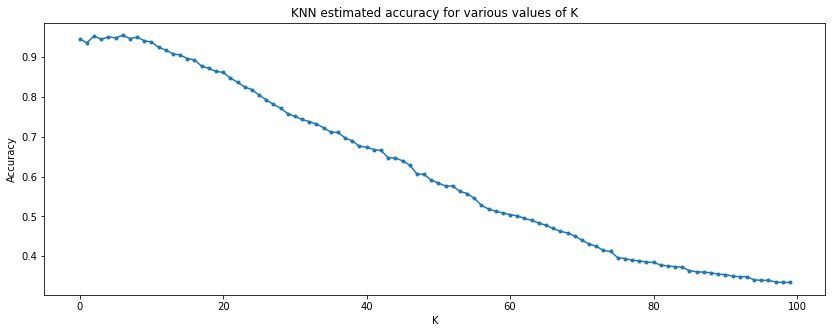

In [34]:
fname = 'iris.csv'
Kmax = 100
optimal_k(fname,Kmax)



Explanation of the graph above and deriving a conclusion of optimal K:

Just like the previous graph above, we expect the overall accuracy to decrease as K grows, since it is no longer calculating according to distances.
If we could choose an optimal K that would calculate new data correctly, we would choose K = [8 , 9 , 10]
According to the graph, those Ks will be reliable enough to distinguish false "unexpected" data points on the one hand, and will take enough data under concideration on the other hand